<a href="https://colab.research.google.com/github/Rinaldrago05/Data_Science_Learning/blob/main/Introduction_To_Machine_Learning_Ishan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Selecting Data for Modeling**



In [11]:
# Importing panas as usual.
# Reading the file to work on with.

import pandas as pd

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Introduction_To_Machine_Learning/melb_data.csv")
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# **Selecting The Prediction Target**

During prediction we try to predict values for a particular field known as the **prediction target** using a model. Now, while training the model, we try to find patterns in other fields known as **features** in the dataset for which the the prediction target values may vary or may not.                                       
**y = prediction target**                
**X = features**


In [12]:
# Here we are selecting the predicton target in y.
# We have used the Price col as our target variable, so after the model has been trained we will use to predict
# values of Price for a given value of features.

y=data.Price

# **Choosing "Features"**

In [13]:
# The X variable is used to store the features, with the help of which while prediction of the target vriable the
# the prediction is done.

X=data[['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']]

In [14]:
X.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.534242,558.416127,-37.809203,144.995216
std,0.955748,0.691712,3990.669241,0.079260,0.103916
min,1.000000,0.000000,0.000000,-38.182550,144.431810
25%,2.000000,1.000000,177.000000,-37.856822,144.929600
50%,3.000000,1.000000,440.000000,-37.802355,145.000100
75%,3.000000,2.000000,651.000000,-37.756400,145.058305
max,10.000000,8.000000,433014.000000,-37.408530,145.526350


# **Building Your Model**

### The steps to build and use a model are:
* **Define:** Different models can be used to train the data. This notebook only deals with decision tree.
* **Fit:** Here we try to fit a model, or try to find patterns in the data.
* **Predict:** After the fitting process is complete, our model is read to predict values.
* **Evaluate:** Hrere, we try to determine how accurate the model's predictions are. We generally do that by calculating error generated. There are many ways to do it.


### The **SCIKIT-LEAN** library is used.

In [15]:
# Here we have used scikit-learn library to create the model.
# While coding the library is written as sklearn.
# We have used the decision tree from the library, so from sklearn.tree we have imported DecisionTreeRegressor class. 

from sklearn.tree import DecisionTreeRegressor

# We create the model using this scikit-learn. The model we are trying to create is a decision tree, in this case.
# The random_state is used to ensusre, that everytime whenever I run this code I will get the same output, due to same randomness.
# That means, the splitting between train and test does not varies.
# If value is changed, then different splitting will occur, resulting in slightly different prediction.
# If not given, different models will be produced everytime the code is run.
# There are many more paramters that can be given in this class.
# The model is an object of the class DecisionTreeRegressor.

model=DecisionTreeRegressor(random_state=1)

#  Here, we fit the model using the features and the target variable, i.e., train the model.
# The fit function can be used to fit the model. We pass the features variable first and the prediction target.

model.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

## **Using the model to make predictions**

In [16]:
# Here, we just try to make some predictions using the model that we just created and predict values for y variable using the model.

print("Making predictions for the following 5 houses:")
print(X.head())

# We can predict values using the predict function, in which we pass the features for which we want to predict values for the target variable.
# To predict the values, we in this case use the same dataset using which we have made the model.

print("The predictions are")
print(model.predict(X.head()))

Making predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude
0      2       1.0     202.0   -37.7996    144.9984
1      2       1.0     156.0   -37.8079    144.9934
2      3       2.0     134.0   -37.8093    144.9944
3      3       2.0      94.0   -37.7969    144.9969
4      4       1.0     120.0   -37.8072    144.9941
The predictions are
[1480000. 1035000. 1465000.  850000. 1600000.]


# **Model Validation**

## **What is Model Validation?**

### Model validation is used to predict the accuracy of the mode. We do so, by at first training a model using some data. And then we try to predict the target value using this model whose real life data is already available to us and we compare those two datas, one the predicted one and the other one already present to predict the accuracy of the model. 

* Now, while predicting the accuracy, one might choose the same data it has used to train the model to predicts its accuracy. But there is a huge problem with that. It is definitely not recommended.

* If we try to compare the two for error, we may get a mix of good and bad predictions. So, if we got 10k predicted and actual values, then going throug 10k error will be useless. Hence, we try to summarize the this into a single metric.

* There are many metrics for summarizing model quality, but here we will mainly use **Mean Absolute Error(MAE)**.

* **mae = avg( | error = actual - predicted | )**

> > We can say that, on average, our predictions are off by about mae. 








In [17]:
# Here we have imported the mean_aboslute_error function from sklean.metrics to find MAE.

from sklearn.metrics import mean_absolute_error

# We at first predict the data, store it.

predicted_data = model.predict(X)

# Then pass the predicted data along with the actual data/values within the MAE function to calculate the error.
mean_absolute_error(y, predicted_data)

1125.1804614629357

## **The Problem with "In-Sample" Scores**

The above code uses the same data to both train and evaluate a model. But it is a bad practice, because, it may find unusual patterns in the data, which actually maynot be present outside in the real world, which results in when we use the same data to predict's its accuracy it will always predict close accurate values for those predicted target rows for which that unusual pattern exists, which affects the error value and we think that our model's accuracy is pretty high. But if we have used a different data to predict's its accuracy, then the error would have bee greater and we could have got a real taste of its accuracy.


* One way to stay away from it is that by having different datasets for training and predicting its accuracy.
* But if we do not have different datas, then we can divide the single dataset given into two parts randomly, where one will be used for training and the other one for predicting the model's accuracy.


> > For diving the dataset we really do not have to do it on our own, we can do it by using the **scikit-learn** library. 







In [18]:
# We have imported the train_test_split function to split the data from sklearn.model_selection.

from sklearn.model_selection import train_test_split

# We use the train_test_split function to split the data into two parts, one for training and the other for predicting accuracy.
# We pass the random_state parameter again to fix the randomness of splitting the dataset by the function.
# So, that everytime we run the code cell, we will get the same split.
# We also pass the features and prediction target variables as parameters.
# The trainig and predictio is further sub divided into two parts one for prediction target and the other for features.
# The features are first returned accompanied by the prediction target values of training and prediction data respectively.

train_X,val_X,train_y,val_y=train_test_split(X,y,random_state=0)

# Here, we again train the model, fit it, predict it and find the error with the spilted data. The error may increase due to this process, which is understandable.
model=DecisionTreeRegressor()
model.fit(train_X,train_y)
predicted_data=model.predict(val_X)
print(mean_absolute_error(val_y,predicted_data))

249645.90014727542


# **Underfitting and Overfitting**

The concept of overfitting and underfitting are discussed below.

## **Experimenting With Different Models**

We can create different models, by using different algorithms, or in this case of decision tree by fixing different depth values for the tree in the model, at different times.

Here, overfitting and underfitting is explained over decision tree.


*   If a tree in a model divides so many times, that the no of rows (items) based on which it defines the value of the prediction target for that particular leaf becomes very few in number, then there is a chance that the prediction done by that model will be quite close to those prediction target's actual values in the training data (i.e., almost matches the real dataset). This causes them to make very unreliable predictions for new data (because each prediction is based on only a few rows on the training set). This phenomenon is known as **Overfitting**. This may arise due to the model finding unwanted patterns in the training dataset which does not got any relaion in the real world.
> > **Overfitting:** capturing spurious patterns that won't recur in the future, leading to less accurate predictions
    
*   On the other hand if a tree in a model does not divides itself into too many leaves, then definitely that model has been unable to identify and capure important patterns in the dataset which exists in real world, then predictions done by that model will also go wrong. This phenomenon is known as **Underfitting**.
> > **Underfitting:** failing to capture relevant patterns, again leading to less accurate predictions.




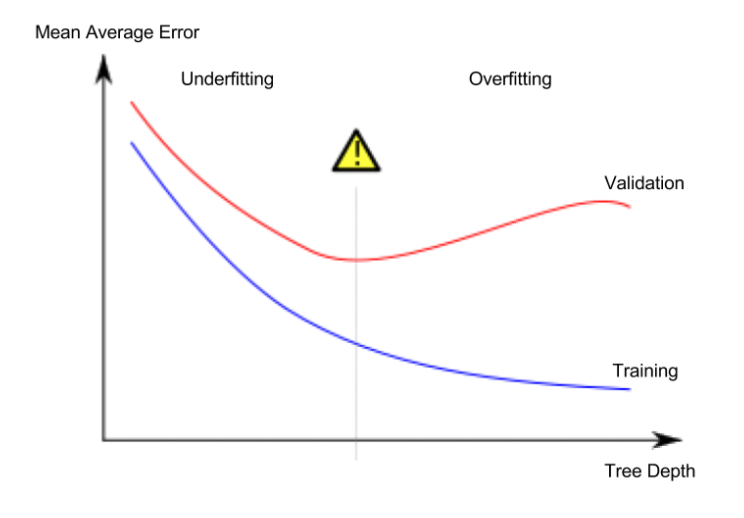

From the above picture we can see that for both the training and validation data, the **MAE** depends on the **Tree Depth**. 



> The left part represents the underfitting, the upper part is the overfitting, divided by the dotted line.


> This dotted line which represents a particular tee depth for a model basically forms the junction between underfitting and overfitting. So, if we choose this tree depth for our model, then we will get the best ideal model. Here, the error value will also be the lowest.



In [19]:
# This get_mae function helps to get mean absolute error value for different depth of the tree in the model which is given by maximum no of nodes at the leaf.

def get_mae(max_leaf_nodes,train_X,train_y,val_X,val_y):

  # Training the model and fitting it.
  model=DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
  model.fit(train_X,train_y)

  # Predicting values and storing it.
  predicted_data=model.predict(val_X)

  # returnig the mae value
  return mean_absolute_error(val_y,predicted_data)

for max_leaf_nodes in [5,50,500,5000]:

  # Calculating the mae value for different number of maximum leaf nodes and printing its values.
  mae=get_mae(max_leaf_nodes,train_X,train_y,val_X,val_y)
  print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d"%(max_leaf_nodes,mae))

Max leaf nodes: 5  		 Mean Absolute Error:  354662
Max leaf nodes: 50  		 Mean Absolute Error:  266447
Max leaf nodes: 500  		 Mean Absolute Error:  231301
Max leaf nodes: 5000  		 Mean Absolute Error:  249163


# **Random Forests**

To destroy or limit this problem of underfitting and overfitting, we may use other models that can lead to a better performance. 

The random forest uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters.

In [20]:
# Here to use the Radom forest model, we import it i.e., RandomForestRegressor class from sklean.ensemble.

from sklearn.ensemble import RandomForestRegressor

# Training and fitting the model.
# forest_model is an object of RandomForestRegressor class.
forest_model=RandomForestRegressor(random_state=1)
forest_model.fit(train_X,train_y)

# Predicting the values from the trained model.
forest_predicted_data=forest_model.predict(val_X)

# Calculating the mean absolute error from it.
print(mean_absolute_error(val_y, forest_predicted_data))

180860.37877504269
